# **1. Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# **2. Data Analysis**

At this stage, the data set was imported and examinations were made such as what type of data it contained and missing data control.

In [2]:
data = pd.read_csv("/kaggle/input/obesity-prediction/Obesity prediction.csv")
data.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [7]:
data.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [9]:
data.shape

(2111, 17)

# **3. Data Preprocessing**

As a result of the review, it was concluded that there were categorical variables in our data set. In order to apply machine learning algorithms, this data must be converted to digital form. In this section, data conversion operations were applied.

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ["Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity"]

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [16]:
data.head(2)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1


Now all data is kept numerically. First, we determined the target variable of the classification problem. Then we divided the data into test and train.

In [18]:
X = data.drop("Obesity", axis=1)
y = data["Obesity"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Model Selection and Training**

## 4.1. Logistic Regression

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred_log_reg = log_reg.predict(X_test)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Accuracy: 0.6548463356973995


In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.53      0.42      0.47        62
           2       0.58      0.60      0.59        78
           3       0.82      0.84      0.83        58
           4       0.90      1.00      0.95        63
           5       0.54      0.38      0.44        56
           6       0.35      0.38      0.37        50

    accuracy                           0.65       423
   macro avg       0.64      0.65      0.64       423
weighted avg       0.64      0.65      0.64       423



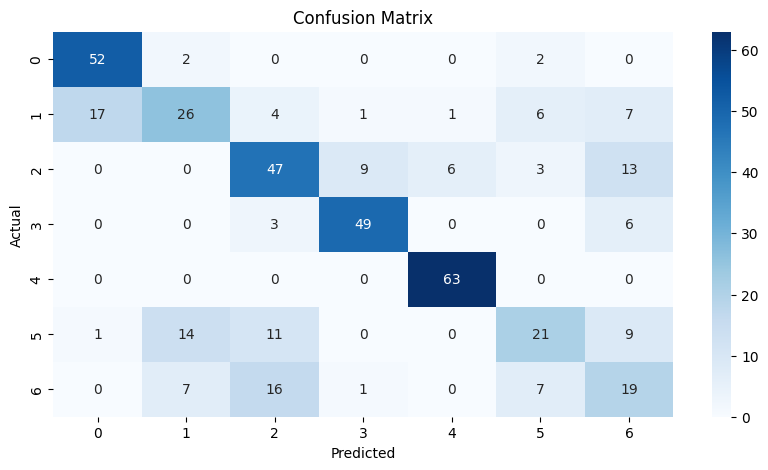

In [36]:
# Confusion Matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 4.2. Random Forest

In [32]:
r_for = RandomForestClassifier(n_estimators = 100)
r_for.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred_r_for = r_for.predict(X_test)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred_r_for))

Accuracy: 0.9479905437352246


In [35]:
print("Classification Report:\n", classification_report(y_test, y_pred_r_for))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.89      0.90      0.90        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.87      0.86      0.86        56
           6       0.94      0.96      0.95        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



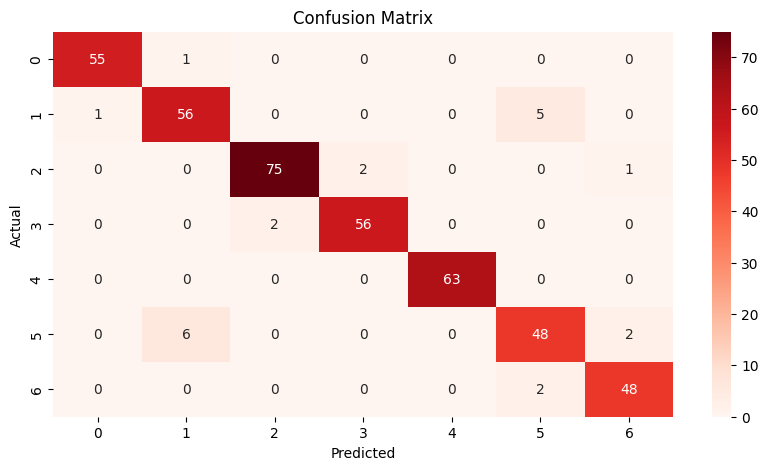

In [39]:
# Confusion Matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_r_for), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 4.3. Desicion Tree

In [40]:
dt_clas = DecisionTreeClassifier()
dt_clas.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred_dt_clas = dt_clas.predict(X_test)

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt_clas))

Accuracy: 0.9361702127659575


In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred_dt_clas))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.87      0.85      0.86        62
           2       0.96      0.92      0.94        78
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        63
           5       0.89      0.91      0.90        56
           6       0.96      0.96      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



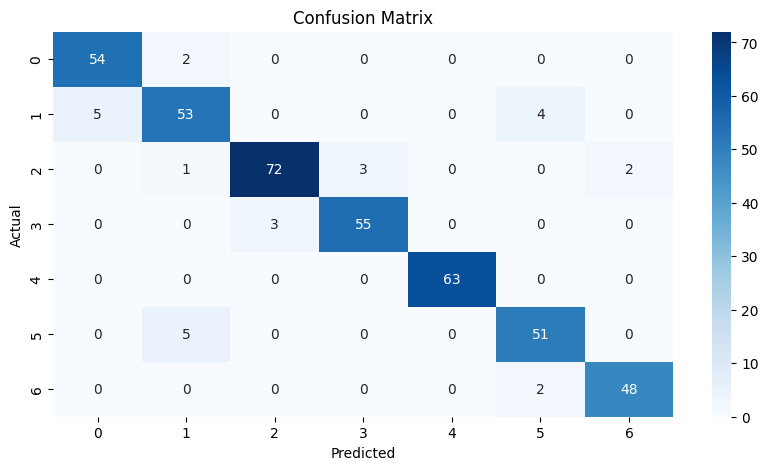

In [45]:
# Confusion Matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_clas), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **5. Model Evaluation**

The desired classification algorithms were applied. As a result of this application, accuracy rate and class-by-class classification matrices were obtained.

* Random Forest has the highest accuracy rate (94.8%) and both precision and recall values ••are quite high.

* Decision Tree has an accuracy rate close to Random Forest (93.6%), but generalization performance may be slightly lower.

* Logistic Regression has a much lower accuracy rate (65.5%) than other models. It has low recall values, especially in some classes, meaning it cannot predict some classes well.

Logistic Regression is not suitable for this dataset. Perhaps better processing of the data (using feature engineering) could improve performance, but it is currently insufficient.

# **6. PCA Analysis**

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

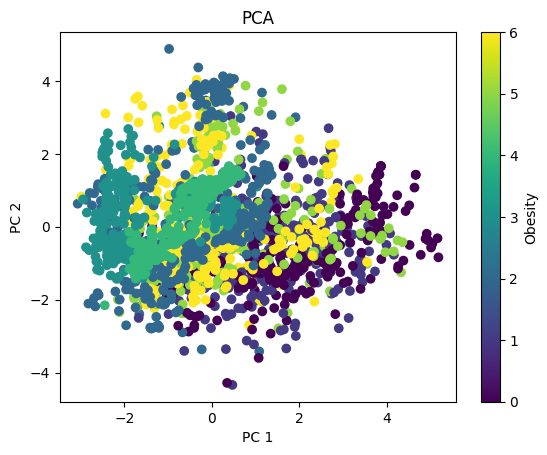

In [55]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')
plt.colorbar(label='Obesity')
plt.show()